In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 19.3 MB/s 
     |████████████████████████████████| 7.6 MB 10.0 MB/s 
     |████████████████████████████████| 182 kB 19.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd 
import re 
from collections import Counter
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model
from sklearn import tree
import nltk
import string
plt.style.use('ggplot')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import plotly.express as px

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Lf3s6JP9wmpNxjTKkrbVpuL1u5wimUio/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Movies_and_TV_5.csv')

df = pd.read_csv('Movies_and_TV_5.csv')
print(df)

         Unnamed: 0      reviewerID        asin  \
0                 0   ADZPIG9QOCDG5  0005019281   
1                 1  A35947ZP82G7JH  0005019281   
2                 2  A3UORV8A9D5L2E  0005019281   
3                 3  A1VKW06X1O2X7V  0005019281   
4                 4  A3R27T4HADWFFJ  0005019281   
...             ...             ...         ...   
1142201     1142201  A19ZXK9HHVRV1X  B0013FZUQA   
1142202     1142202   AM2PV53UX1JEQ  B0013FZUQA   
1142203     1142203   AGDD9T5BOHAOA  B0013FZUQA   
1142204     1142204   AWBSBYIPOYRL0  B0013FZUQA   
1142205     1142205  A2PN7Z2VTHICL8  B0013FZUQA   

                                    reviewerName  helpful  \
0            Alice L. Larson "alice-loves-books"   [0, 0]   
1                                  Amarah Strack   [0, 0]   
2                                Amazon Customer   [0, 0]   
3                     Amazon Customer "Softmill"   [0, 0]   
4                                           BABE   [0, 0]   
...                  

In [ ]:
#df=pd.read_csv('Movies_and_TV_5.csv')
print(df.shape)

(1142206, 10)


In [ ]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"


In [ ]:
df= df.rename(columns={'Unnamed: 0': 'ID'})
df

,ID,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...,...
1142201,1142201,A19ZXK9HHVRV1X,B0013FZUQA,Roland E. Zwick,"[0, 1]",As if Mexico didn't have problems enough - wha...,2,stuck on the top with no way down,1250899200,"08 22, 2009"
1142202,1142202,AM2PV53UX1JEQ,B0013FZUQA,R. Penola,"[9, 15]","Scott Smith's book has a pulpy, can't put it d...",1,RUINED,1209427200,"04 29, 2008"
1142203,1142203,AGDD9T5BOHAOA,B0013FZUQA,"Ruggero Deodato ""Where Has HORROR GONE""","[0, 1]",WHAT A FANTASTIC HORROR MOVIE DONE IN THAT CLA...,4,it's a fun classic,1216598400,"07 21, 2008"
1142204,1142204,AWBSBYIPOYRL0,B0013FZUQA,Ryan,"[1, 1]",I wouldn't blame you if you labeled The Ruins ...,4,A Movie About Ruins.....,1241395200,"05 4, 2009"


In [ ]:
#Check for null entries in columns
df.isnull().sum(axis=0)

ID                   0
reviewerID           0
asin                 0
reviewerName      3907
helpful              0
reviewText          43
overall              0
summary             14
unixReviewTime       0
reviewTime           0
dtype: int64

In [ ]:
pip install essential_generators

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 19.4 MB/s 


In [ ]:
from essential_generators import DocumentGenerator
gen = DocumentGenerator()
print(gen.sentence())

Were exposed this status, with 13.05% of the American


In [ ]:
df = df.fillna(gen.sentence())
df.isnull().sum(axis=0)

ID                0
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [ ]:
df.shape

(1142206, 10)

In [ ]:
for id, df_i in  enumerate(np.array_split(df.sample(frac=1), 10)):
    df_i.to_csv('Movies_and_TV_Review_{id}.csv'.format(id=id))

In [ ]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
pip install imblearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
rf1 = pd.read_csv('Movies_and_TV_Review_2.csv')
print(rf1.shape)

(114221, 11)


In [ ]:
rf2 = pd.read_csv('Movies_and_TV_Review_7.csv')
print(rf1.shape)

(114221, 11)


In [ ]:
rf1 = rf1.drop('Unnamed: 0',axis=1)
rf1.head()

,ID,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1002550,A2LWYAEWSMPEFZ,B000GEIRV4,OBSERVER62,"[0, 0]",THE END OF MOVIE OUT TAKES ARE WELL WORTH ...,4,THE FLICK IS OKAY.: READ ON,1390176000,"01 20, 2014"
1,372367,A1TONI9A0YFOD6,6303398375,Bruce Rux,"[2, 2]",If you love Ray Harryhausen's stop-motion anim...,3,Venus Sends Her Love,1022457600,"05 27, 2002"
2,832853,A2T13NZVJ0KBC9,B0002F6BTC,Cajun Girl,"[1, 2]",love it - had seen on PBS station and wanted t...,5,keeping up appearances,1294617600,"01 10, 2011"
3,316435,AB7F5Z957Y40A,6302503493,veronica,"[0, 0]",The uninvited 1944Was and still is one of the ...,5,One of a kind,1359676800,"02 1, 2013"
4,848824,A2QHM5HBSIXRL4,B0002WZTJS,Andy Orrock,"[4, 4]",We figured that with Clive Owen and Jonathan R...,2,"Had hopes with its great cast, but a disappoin...",1104969600,"01 6, 2005"


In [ ]:
rf2 = rf2.drop('Unnamed: 0',axis=1)


In [ ]:
df['overall'].value_counts()

5    619155
4    258719
3    130734
1     67117
2     66481
Name: overall, dtype: int64

In [ ]:
rating_pct = df['overall'].value_counts()/len(df) * 100
rating_pct

5    54.206947
4    22.650818
3    11.445746
1     5.876085
2     5.820404
Name: overall, dtype: float64

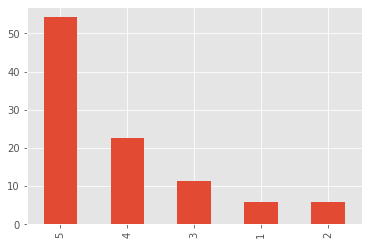

In [ ]:
rating_pct.plot.bar()
plt.show()

In [ ]:
rating_pct_1 = rf1['overall'].value_counts()/len(rf1) * 100
rating_pct_1

5    54.223829
4    22.534385
3    11.487380
1     5.934986
2     5.819420
Name: overall, dtype: float64

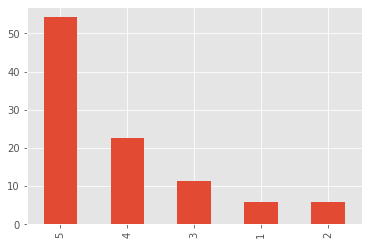

In [ ]:
rating_pct_1.plot.bar()
plt.show()

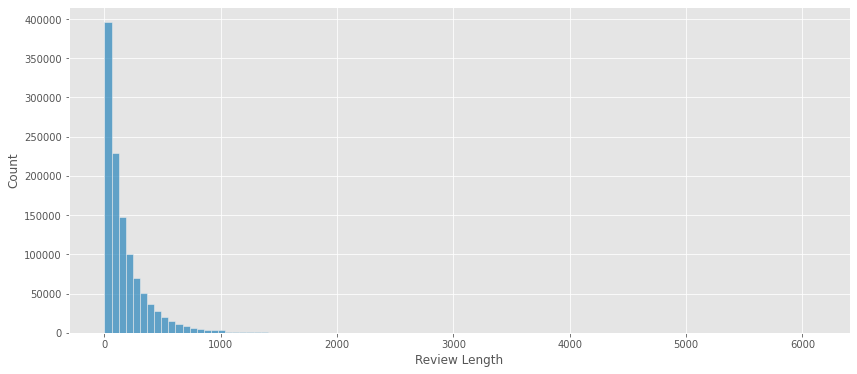

In [ ]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['reviewText'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

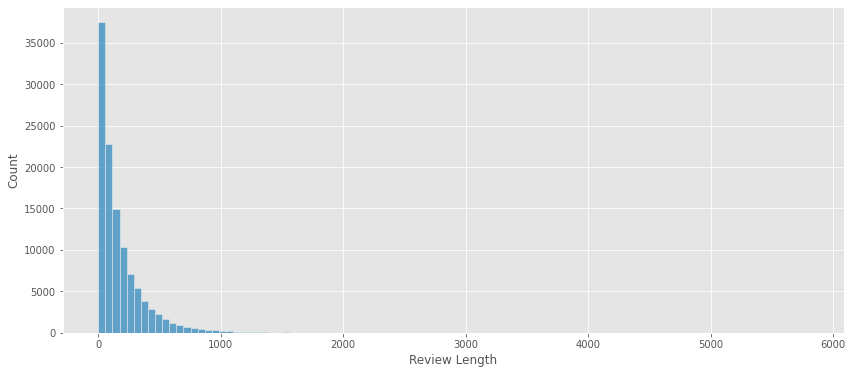

In [ ]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = rf1['reviewText'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

In [ ]:
rf1.describe(include = "all")

,ID,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,1.142210e+05,114221,114221,114221,114221,114221,114221.000000,114221,1.142210e+05,114221
unique,NaN,52292,24651,48826,2315,114194,NaN,101299,NaN,5606
top,NaN,A16CZRQL23NOIW,1608838137,Amazon Customer,"[0, 0]","Staff, Rahm Rainer Fetting. Other notable plat...",NaN,Great Movie,NaN,"02 10, 2013"
freq,NaN,219,141,677,36433,7,NaN,297,NaN,122
mean,5.712633e+05,NaN,NaN,NaN,NaN,NaN,4.132927,NaN,1.220880e+09,NaN
std,3.297157e+05,NaN,NaN,NaN,NaN,NaN,1.185909,NaN,1.344172e+08,NaN
min,3.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,8.798976e+08,NaN
25%,2.870640e+05,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.115424e+09,NaN
50%,5.709720e+05,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.214784e+09,NaN
75%,8.577190e+05,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.360109e+09,NaN


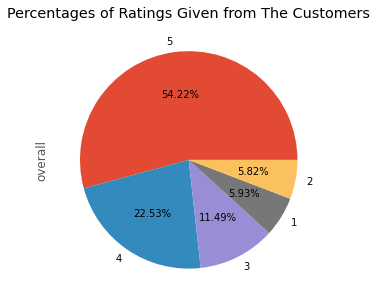

In [ ]:
rf1.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(5,5))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
rf1["sentiment"] = rf1.apply(Labelling, axis = 1)
rf2["sentiment"] = rf2.apply(Labelling, axis = 1)

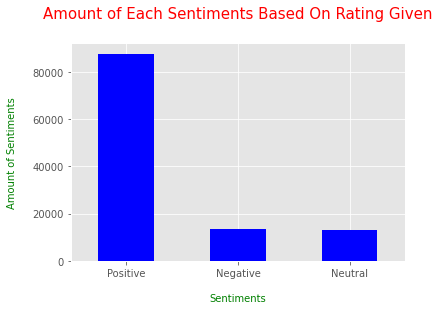

In [ ]:
rf1["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
rf1['reviewText'].iloc[15000]

'I  was so dissapointed by this mess,it starts out strong with an energy filled intro to the dumb kids who go on a trip to the woods they could have taken themselves for free,but decide to pay some fruit cake they havent even seen on a blair witch web site.To make a long story short, you know the creators should have been beaten with a baseball bat when they put the characters in an abandoned broom factory.plus the only way they THINK they find out what happens to them after they blackout is on video that they have to  watch backwards?!? How in the world  you screw up a movie like this i will never know....'

In [ ]:
rf1["reviewText"] = rf1["reviewText"].apply(lambda Text: Text_Cleaning(Text))
rf2["reviewText"] = rf2["reviewText"].apply(lambda Text: Text_Cleaning(Text))

In [ ]:
rf1['reviewText'].iloc[15000]

'i  was so dissapointed by this mess it starts out strong with an energy filled intro to the dumb kids who go on a trip to the woods they could have taken themselves for free but decide to pay some fruit cake they havent even seen on a blair witch web site to make a long story short  you know the creators should have been beaten with a baseball bat when they put the characters in an abandoned broom factory plus the only way they think they find out what happens to them after they blackout is on video that they have to  watch backwards    how in the world  you screw up a movie like this i will never know    '

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
rf1["reviewText"] = rf1["reviewText"].apply(lambda Text: Text_Processing(Text))
rf2["reviewText"] = rf2["reviewText"].apply(lambda Text: Text_Processing(Text))
rf1['reviewText'].iloc[15000]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


'dissapointed mess start strong energy filled intro dumb kid go trip wood could taken free decide pay fruit cake havent even seen blair witch web site make long story short know creator beaten baseball bat put character abandoned broom factory plus way think find happens blackout video watch backwards world screw movie like never know'

In [ ]:
#Extracting polarity score on reviewText
rf1["Sent_Pol"] = rf1["reviewText"].map(lambda Text: TextBlob(Text).sentiment.polarity)
rf2["Sent_Pol"] = rf2["reviewText"].map(lambda Text: TextBlob(Text).sentiment.polarity)

In [ ]:
rf1.head()

,ID,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,Sent_Pol
0,1002550,A2LWYAEWSMPEFZ,B000GEIRV4,OBSERVER62,"[0, 0]",end movie take well worth staying around great...,4,THE FLICK IS OKAY.: READ ON,1390176000,"01 20, 2014",Positive,0.285714
1,372367,A1TONI9A0YFOD6,6303398375,Bruce Rux,"[2, 2]",love ray harryhausen stop motion animation mon...,3,Venus Sends Her Love,1022457600,"05 27, 2002",Neutral,0.186435
2,832853,A2T13NZVJ0KBC9,B0002F6BTC,Cajun Girl,"[1, 2]",love seen pb station wanted buy didgreat briti...,5,keeping up appearances,1294617600,"01 10, 2011",Positive,0.433333
3,316435,AB7F5Z957Y40A,6302503493,veronica,"[0, 0]",uninvited still one best ghost story ever cga ...,5,One of a kind,1359676800,"02 1, 2013",Positive,0.535714
4,848824,A2QHM5HBSIXRL4,B0002WZTJS,Andy Orrock,"[4, 4]",figured clive owen jonathan rhys meyers headli...,2,"Had hopes with its great cast, but a disappoin...",1104969600,"01 6, 2005",Negative,0.103333


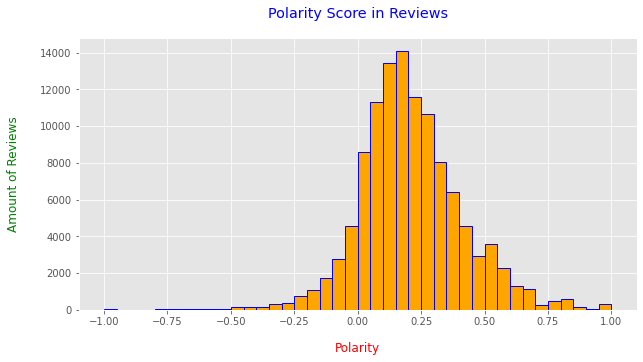

In [ ]:
rf1["Sent_Pol"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
rf1["length"] = rf1["reviewText"].astype(str).apply(len)
rf2["length"] = rf2["reviewText"].astype(str).apply(len)

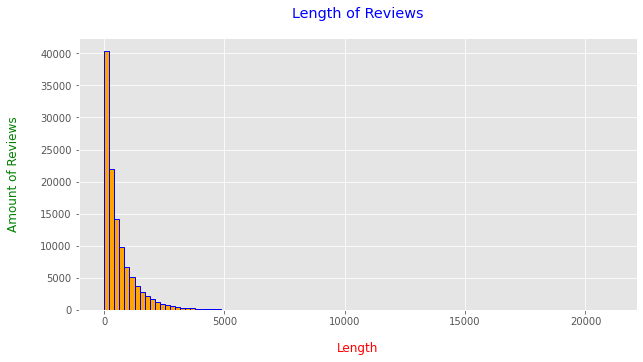

In [ ]:
rf1["length"].plot(kind = "hist", bins = 100, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
rf1["counts"] = rf1["reviewText"].apply(lambda x: len(str(x).split()))
rf2["counts"] = rf2["reviewText"].apply(lambda x: len(str(x).split()))

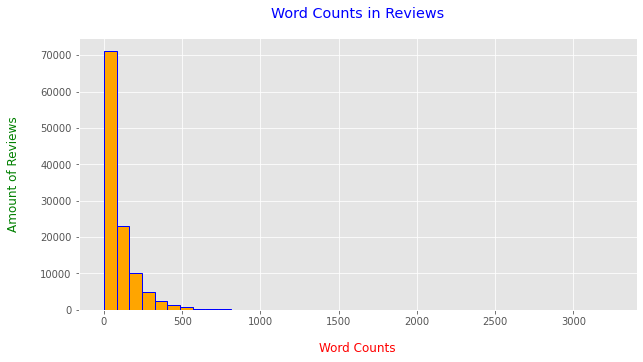

In [ ]:
rf1["counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [ ]:
# Use dropna() so the base DataFrame is not affected
Positive = rf1[rf1["sentiment"] == "Positive"].dropna()
Neutral = rf1[rf1["sentiment"] == "Neutral"].dropna()
Negative = rf1[rf1["sentiment"] == "Negative"].dropna()

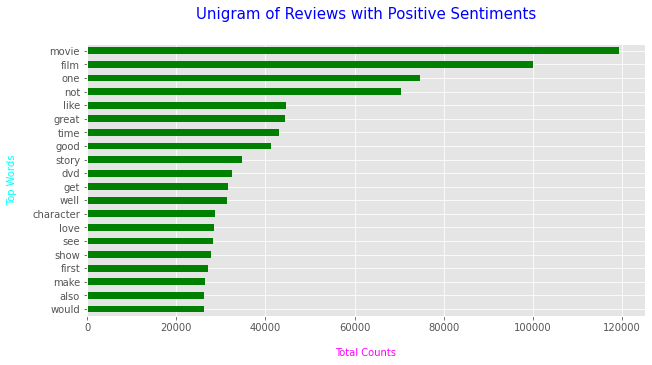

In [ ]:
# Finding Unigram
words = Gram_Analysis(Positive["reviewText"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

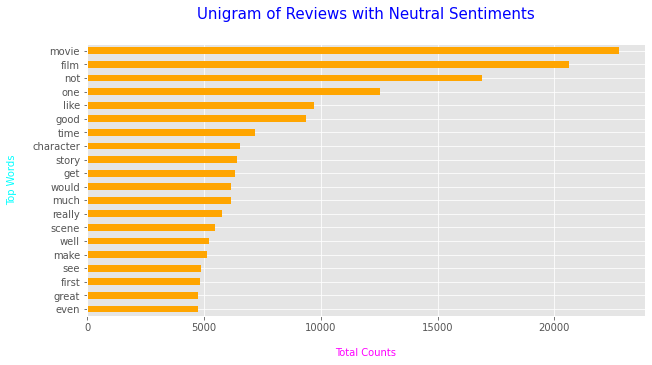

In [ ]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviewText"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

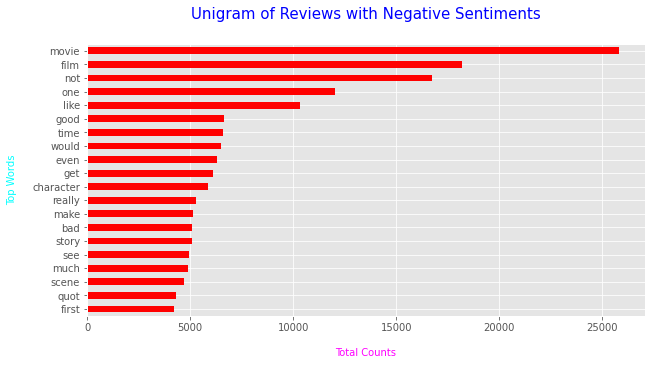

In [ ]:
# Finding Unigram
words = Gram_Analysis(Negative["reviewText"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

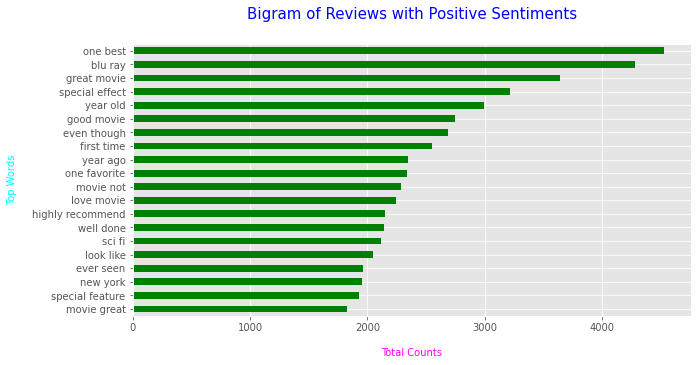

In [ ]:
# Finding Bigram
words = Gram_Analysis(Positive["reviewText"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

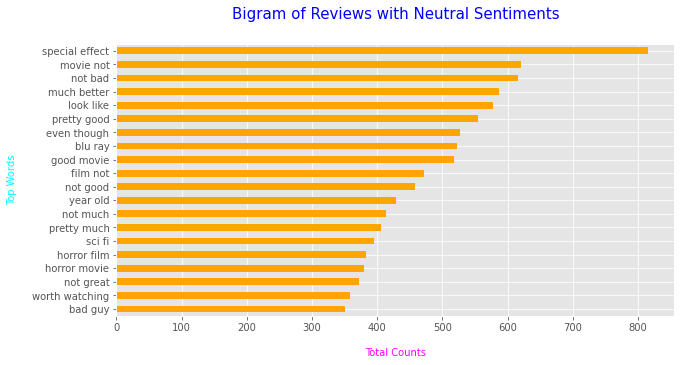

In [ ]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviewText"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

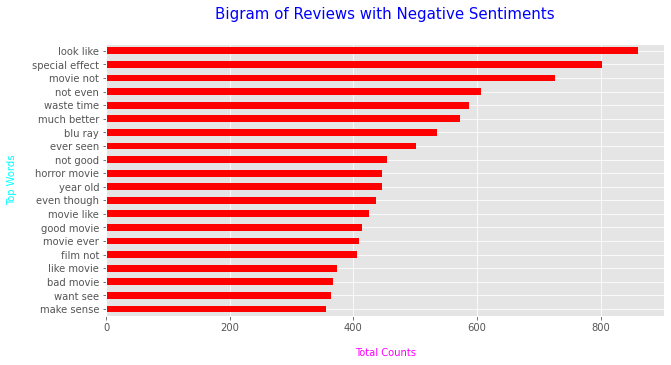

In [ ]:
# Finding Bigram
words = Gram_Analysis(Negative["reviewText"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

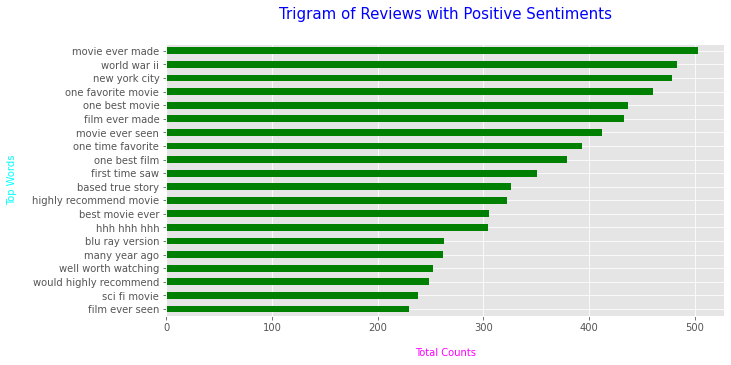

In [ ]:
# Finding Trigram
words = Gram_Analysis(Positive["reviewText"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

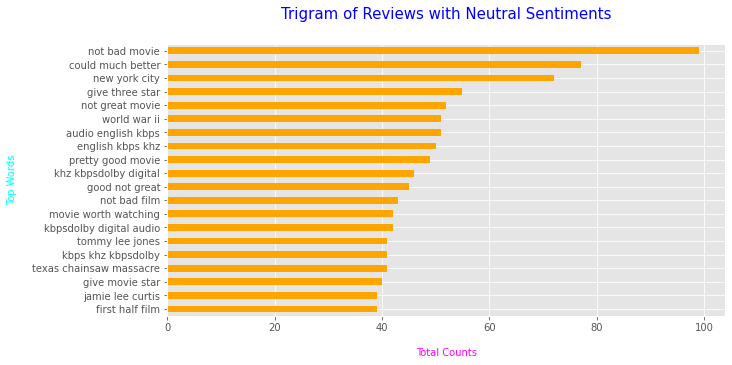

In [ ]:
# Finding Trigram
words = Gram_Analysis(Neutral["reviewText"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

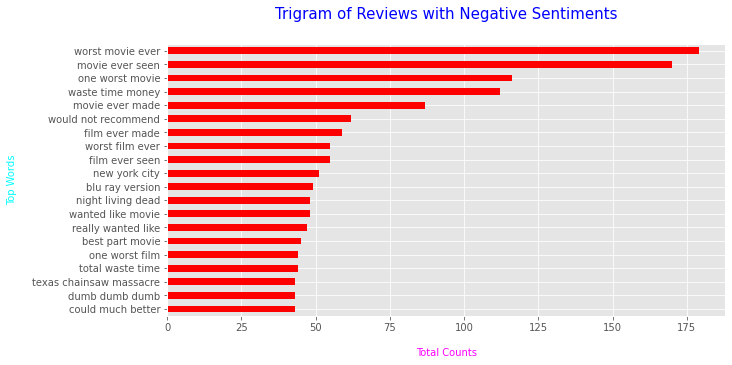

In [ ]:
# Finding Trigram
words = Gram_Analysis(Negative["reviewText"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

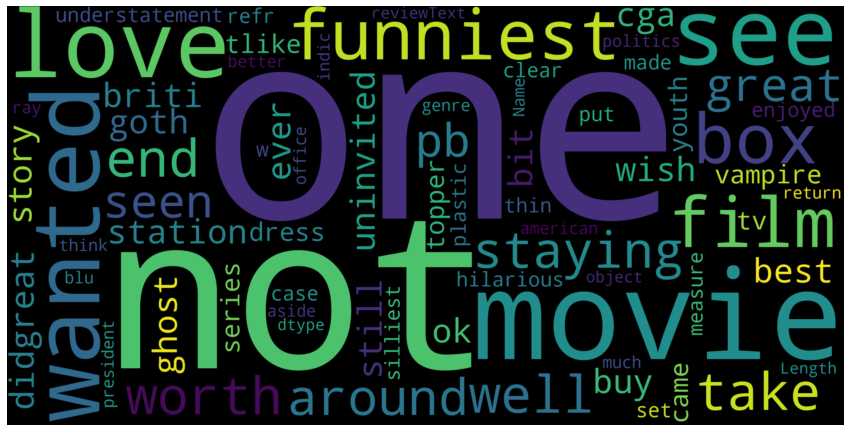

In [ ]:
wordCloud = WordCloud(max_words = 500, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviewText"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

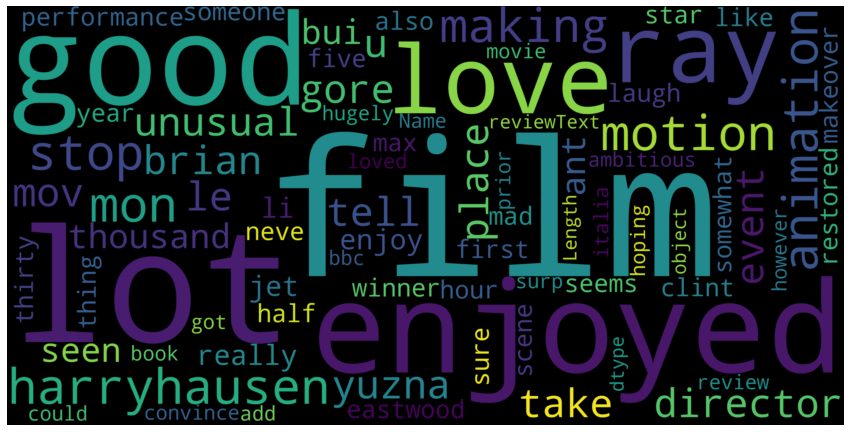

In [ ]:
wordCloud = WordCloud(max_words = 500, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviewText"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

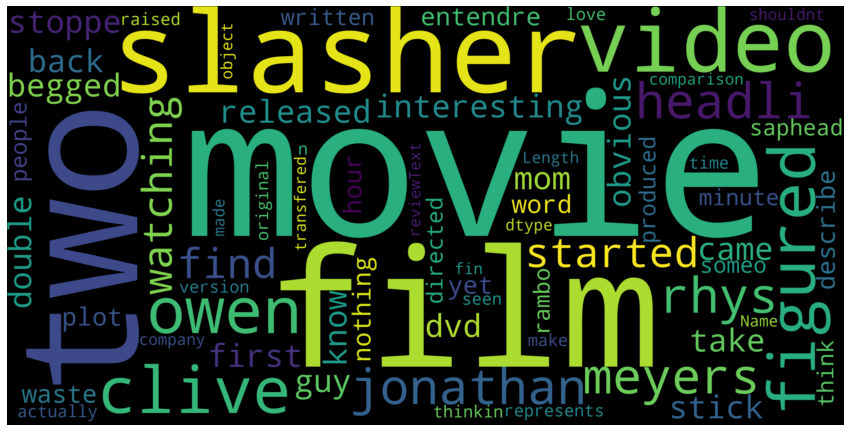

In [ ]:
wordCloud = WordCloud(max_words = 500, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviewText"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
print(rf1.columns)

Index(['ID', 'reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'sentiment',
       'Sent_Pol', 'length', 'counts'],
      dtype='object')


In [ ]:
Columns = ['ID', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'overall', 'summary', 'unixReviewTime', 'reviewTime',
       'Sent_Pol', 'length', 'counts']
rf1.drop(columns = Columns, axis = 1, inplace = True)

In [ ]:
Columns1 = ['ID', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'overall', 'summary', 'unixReviewTime', 'reviewTime',
       'Sent_Pol', 'length', 'counts']
rf2.drop(columns = Columns1, axis = 1, inplace = True)

In [ ]:
rf1.head()

,reviewText,sentiment
0,end movie take well worth staying around great...,Positive
1,love ray harryhausen stop motion animation mon...,Neutral
2,love seen pb station wanted buy didgreat briti...,Positive
3,uninvited still one best ghost story ever cga ...,Positive
4,figured clive owen jonathan rhys meyers headli...,Negative


In [ ]:
Encoder = LabelEncoder()
rf1["sentiment"] = Encoder.fit_transform(rf1["sentiment"])
rf2["sentiment"] = Encoder.fit_transform(rf2["sentiment"])

In [ ]:
rf1["sentiment"].value_counts()

2    87674
0    13426
1    13121
Name: sentiment, dtype: int64

In [ ]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(rf1["reviewText"])
X_1=TF_IDF.fit_transform(rf2["reviewText"])
# Check our matrix shape
X.shape

(114221, 5000)

In [ ]:
# Declaring our target variable
y = rf1["sentiment"]
y_1 = rf2["sentiment"]

In [ ]:
#Counter(y)

In [ ]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)
X_fin, y_fin = Balancer.fit_resample(X_1, y_1)

In [ ]:
#Counter(y_final)

In [ ]:
X_train=X
X_test=X_1
y_train=y
y_test=y_1

In [ ]:
y_train

0         2
1         1
2         2
3         2
4         0
         ..
114216    0
114217    2
114218    2
114219    2
114220    2
Name: sentiment, Length: 114221, dtype: int64

In [ ]:
y_test

0         2
1         2
2         2
3         2
4         1
         ..
114215    1
114216    2
114217    2
114218    0
114219    0
Name: sentiment, Length: 114220, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 1232   314 11890]
 [ 1161   229 11590]
 [ 6002  1647 80155]]
              precision    recall  f1-score   support

           0       0.15      0.09      0.11     13436
           1       0.10      0.02      0.03     12980
           2       0.77      0.91      0.84     87804

    accuracy                           0.71    114220
   macro avg       0.34      0.34      0.33    114220
weighted avg       0.62      0.71      0.66    114220



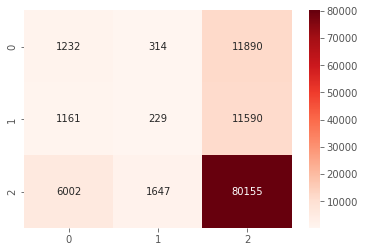

In [ ]:

sns.heatmap(confusion_matrix(y_test,predictions), cmap='Reds',annot=True, fmt='g')

In [ ]:
from sklearn.metrics import mean_absolute_error                               #Calculating MAE
from sklearn.metrics import mean_squared_error            #Calculating MSE
print("MSE: "+str(mean_squared_error(y_test,predictions)))  
print("RMSE: "+str(np.sqrt(mean_squared_error(y_test,predictions)))) 
print("MAE: "+str(mean_absolute_error(y_test,predictions)))
print(accuracy_score(y_test, predictions))

MSE: 0.7553843459989494
RMSE: 0.8691284979788371
MAE: 0.44209420416739625
0.7145508667483803


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
n_pred=clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,n_pred))
print(classification_report(y_test,n_pred))

[[  102     8 13326]
 [   87    10 12883]
 [  300    28 87476]]
              precision    recall  f1-score   support

           0       0.21      0.01      0.01     13436
           1       0.22      0.00      0.00     12980
           2       0.77      1.00      0.87     87804

    accuracy                           0.77    114220
   macro avg       0.40      0.33      0.29    114220
weighted avg       0.64      0.77      0.67    114220



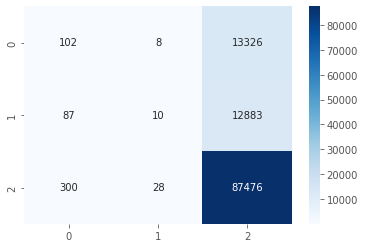

In [ ]:
sns.heatmap(confusion_matrix(y_test,n_pred), cmap='Blues',annot=True, fmt='g')

In [ ]:
print("MSE: "+str(mean_squared_error(y_test,n_pred)))  
print("RMSE: "+str(np.sqrt(mean_squared_error(y_test,n_pred)))) 
print("MAE: "+str(mean_absolute_error(y_test,n_pred)))
print(accuracy_score(y_test, n_pred))

MSE: 0.5910523551041849
RMSE: 0.768799294422273
MAE: 0.3524601645946419
0.7668359306601296


In [ ]:
res = {}
for i, row in tqdm(rf1.iterrows(), total=len(rf1)):
    text = row['reviewText']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/114221 [00:00<?, ?it/s]

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
hidden_size = 200

In [ ]:
from transformers import *

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tra

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentim

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 17.9 MB/s 
     |████████████████████████████████| 90 kB 9.1 MB/s 
     |████████████████████████████████| 132 kB 43.5 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 132 kB 61.8 MB/s 
     |████████████████████████████████| 10.2 MB 62.1 MB/s 
     |████████████████████████████████| 140 kB 76.6 MB/s 
     |████████████████████████████████| 127 kB 64.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/config.json
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/config.json
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentimen

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--nlptown--bert-base-multilingual-uncased-sentiment/snapshots/e06857fdb0325a7798a8fc361b417dfeec3a3b98/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
def sentiment_score(reviewText):
    tokens = tokenizer.encode(reviewText, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(rf1['reviewText'].iloc[1])

1

In [ ]:
p=rf1.head(5000)

In [ ]:
p['Rating_BERT'] = p['reviewText'].apply(lambda x: sentiment_score(x[:512]))

<ipython-input-120-3fb15256e204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['Rating_BERT'] = p['reviewText'].apply(lambda x: sentiment_score(x[:512]))


In [ ]:
p.head()

,reviewText,sentiment,Rating_BERT
0,end movie take well worth staying around great...,2,4
1,love ray harryhausen stop motion animation mon...,1,1
2,love seen pb station wanted buy didgreat briti...,2,5
3,uninvited still one best ghost story ever cga ...,2,5
4,figured clive owen jonathan rhys meyers headli...,0,2
